### Let's see how validation accuracy increases across epochs

In [1]:
from __future__ import print_function


import os
import glob
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

from vit_pytorch.vivit import ViT
from training import VideoDataset, data_transform
torch.device('cpu')

device(type='cpu')

In [2]:
## Load the model

model = ViT(
        image_size = (240,320),          # image size
        frames = 450,                    # number of frames
        image_patch_size = (80,80),      # image patch size
        frame_patch_size = 45,           # frame patch size
        num_classes = 2,
        dim = 64,
        spatial_depth = 3,               # depth of the spatial transformer
        temporal_depth = 3,              # depth of the temporal transformer
        heads = 4,
        mlp_dim = 126
    )


### Read all files in the checkpoint folder that start with 'checkpoint'
checkpoint_folder = './checkpoints'

checkpoint_files = glob.glob(f"{checkpoint_folder}/checkpoint*.pt")


In [3]:
checkpoint_files

['./checkpoints/checkpoint_epoch40.pt',
 './checkpoints/checkpoint_epoch160.pt',
 './checkpoints/checkpoint_epoch10.pt',
 './checkpoints/checkpoint_epoch80.pt',
 './checkpoints/checkpoint_epoch100.pt',
 './checkpoints/checkpoint_epoch50.pt',
 './checkpoints/checkpoint_epoch230.pt',
 './checkpoints/checkpoint_epoch120.pt',
 './checkpoints/checkpoint_epoch110.pt',
 './checkpoints/checkpoint_epoch200.pt',
 './checkpoints/checkpoint_epoch90.pt',
 './checkpoints/checkpoint_epoch220.pt',
 './checkpoints/checkpoint_epoch20.pt',
 './checkpoints/checkpoint_epoch130.pt',
 './checkpoints/checkpoint_epoch70.pt',
 './checkpoints/checkpoint_epoch2.pt',
 './checkpoints/checkpoint_epoch150.pt',
 './checkpoints/checkpoint_epoch250.pt',
 './checkpoints/checkpoint_epoch170.pt',
 './checkpoints/checkpoint_epoch30.pt',
 './checkpoints/checkpoint_epoch240.pt',
 './checkpoints/checkpoint_epoch140.pt',
 './checkpoints/checkpoint_epoch190.pt',
 './checkpoints/checkpoint_epoch60.pt',
 './checkpoints/checkpoint_

In [4]:
## Get the validation dataset

root_dir    = './dataset/learning'
val_dir     = os.path.join(root_dir, 'validation')
val_dataset     = VideoDataset(val_dir, transform=data_transform)

validation_dataloader   = DataLoader(val_dataset, batch_size=2, shuffle=True, num_workers=0)

In [5]:
## Calculate validation losses and accuracy along with epoch stamp

validation_losses = []
validation_accuracy = []
epochs = []


criterion = nn.CrossEntropyLoss()


for checkpoint_file in checkpoint_files:

    # Load the checkpoint
    checkpoint  = torch.load(checkpoint_file)
    checkpoint_epochs = checkpoint['epoch']


    model.load_state_dict(checkpoint['model_state_dict'])

    
    model.eval()  # Set the model to evaluation mode
    
    # Initialize variables to keep track of accuracy and loss
    total_samples = 0
    correct_predictions = 0
    total_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in validation_dataloader:
    
    
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
    
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            total_loss += loss.item()
    
    # Calculate accuracy and loss
    accuracy = correct_predictions / total_samples
    average_loss = total_loss / len(validation_dataloader)
    epochs.append(checkpoint_epochs)
    validation_losses.append(average_loss)
    validation_accuracy.append(accuracy)
    print(f"Validation Loss: {average_loss:.4f}")
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Loss: 0.1241
Validation Accuracy: 94.94%
Validation Loss: 0.3877
Validation Accuracy: 96.20%
Validation Loss: 0.5260
Validation Accuracy: 77.22%
Validation Loss: 0.2017
Validation Accuracy: 96.20%
Validation Loss: 0.2711
Validation Accuracy: 96.20%
Validation Loss: 0.1105
Validation Accuracy: 94.94%
Validation Loss: 0.5075
Validation Accuracy: 96.20%
Validation Loss: 0.3138
Validation Accuracy: 96.20%
Validation Loss: 0.2933
Validation Accuracy: 96.20%
Validation Loss: 0.4566
Validation Accuracy: 96.20%
Validation Loss: 0.2446
Validation Accuracy: 96.20%
Validation Loss: 0.4906
Validation Accuracy: 96.20%
Validation Loss: 0.2222
Validation Accuracy: 91.14%
Validation Loss: 0.3331
Validation Accuracy: 96.20%
Validation Loss: 0.1338
Validation Accuracy: 94.94%
Validation Loss: 0.5356
Validation Accuracy: 77.22%
Validation Loss: 0.3699
Validation Accuracy: 96.20%
Validation Loss: 0.5412
Validation Accuracy: 96.20%
Validation Loss: 0.4052
Validation Accuracy: 96.20%
Validation L

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the loss curve
plt.rcParams["font.family"] = "Times New Roman"

sns.set_theme(style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc=None)

In [7]:
## Sort the lists according to epochs 


# Zip the lists together based on epochs
zipped_data = list(zip(validation_losses, validation_accuracy, epochs))

# Sort the zipped data based on epochs (ascending order)
zipped_data.sort(key=lambda x: x[-1])  # Assuming epochs are the last element in the tuple

# Unzip the sorted data back into separate lists
validation_losses, validation_accuracy, epochs = zip(*zipped_data)

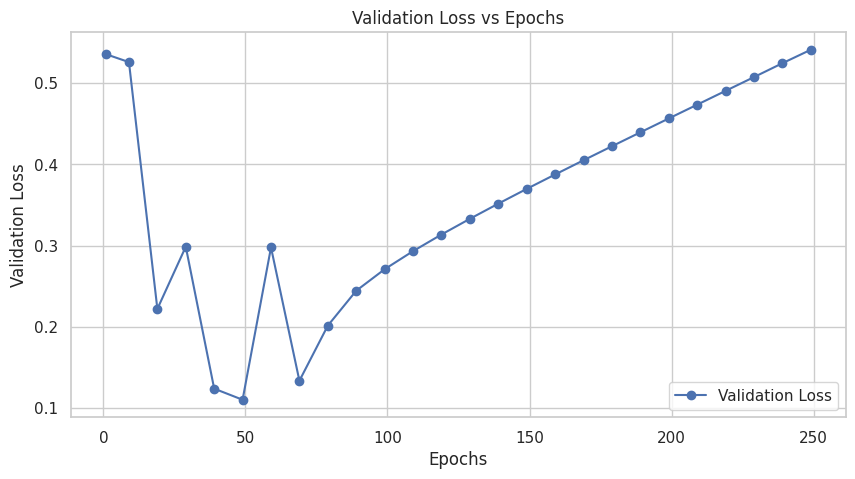

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(epochs, validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

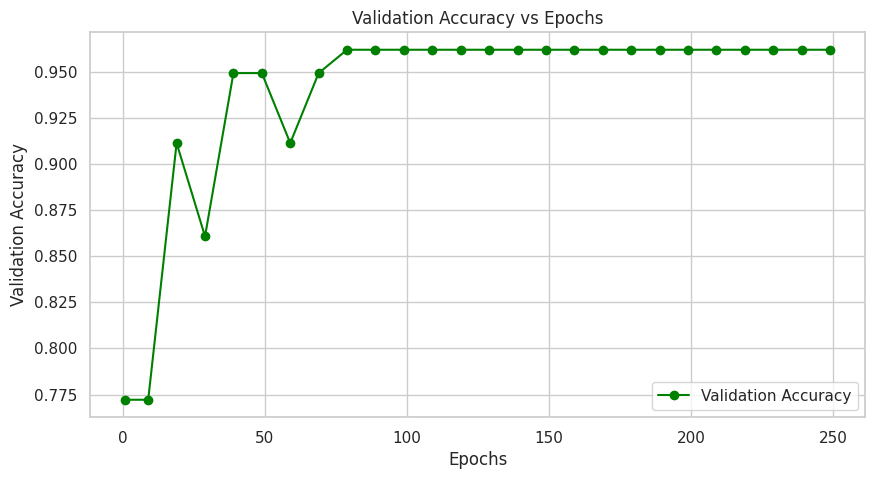

In [9]:
# Plot validation accuracy vs epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('validation_accuracy.jpg')
plt.show()